In [126]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Lib

In [135]:
# Basic lib
import pandas as pd
import numpy as np
import os
import sys

# Plot lib
import matplotlib.pyplot as plt
import matplotlib.dates as dates
from matplotlib.patches import Rectangle

## Load

In [136]:
# Before fill missing values with mice,
# So drop rows that has missing(nan) value
train_df = pd.read_feather('./data/match/ml_train_valid.fth').dropna()

In [137]:
# Extract some cols that related to bank's info 
bank_cols = [
    'bank_id',
    'product_id',
    'loan_rate',
    'cofix_rate',
    'credit_score',
    'existing_loan_amt'
    ]

In [138]:
loan_bank_df = train_df[bank_cols]

In [139]:
# Define derived Variables ('loan_rate_per_cofix_rate' & 'loan_amt_per_credit_score')
# There is no 'inf' value after this process
loan_bank_df['loan_rate_per_cofix_rate'] = loan_bank_df['loan_rate'] / loan_bank_df['cofix_rate']
#loan_bank_df['loan_amt_per_credit_score'] = loan_bank_df['existing_loan_amt'] / loan_bank_df['credit_score']

/tmp/ipykernel_3226/2719267202.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [140]:
loan_bank_df

,bank_id,product_id,loan_rate,cofix_rate,credit_score,existing_loan_amt,loan_rate_per_cofix_rate
18,10,149,16.2,1.57,560.0,28000000.0,10.318471
19,47,47,7.2,1.57,560.0,28000000.0,4.585987
20,59,251,7.4,1.57,560.0,28000000.0,4.713376
21,38,223,17.4,1.57,560.0,28000000.0,11.082803
22,38,16,17.4,1.57,560.0,28000000.0,11.082803
...,...,...,...,...,...,...,...
10264359,19,231,15.8,1.97,690.0,56000000.0,8.020305
10264360,1,61,10.4,1.97,690.0,56000000.0,5.279188
10264361,30,114,14.3,1.97,690.0,56000000.0,7.258883
10264362,51,247,13.8,1.97,690.0,56000000.0,7.005076


In [141]:
bank_id_list = []
num_applied_loan_list = []
num_product_list = []
avg_loan_rate_list = []
avg_cofix_rate_list = []
avg_credit_score_list = []
avg_existing_loan_amt_list = []
avg_loan_rate_per_cofix_rate_list = []
for bank_id, bank_df in loan_bank_df.groupby('bank_id'):
    bank_id_list.append(bank_id)
    num_applied_loan_list.append(len(bank_df))
    num_product_list.append(len(bank_df.product_id.unique()))
    avg_loan_rate_list.append(bank_df.loan_rate.mean())
    avg_cofix_rate_list.append(bank_df.cofix_rate.mean())
    avg_credit_score_list.append(bank_df.credit_score.mean())
    avg_existing_loan_amt_list.append(bank_df.existing_loan_amt.mean())
    avg_loan_rate_per_cofix_rate_list.append(bank_df.loan_rate_per_cofix_rate.mean())

In [142]:
bank_info_df = pd.DataFrame({
    'bank_id': bank_id_list,
    #'num_applied_loan': num_applied_loan_list,
    # 'num_product': num_product_list,
    'avg_loan_rate': avg_loan_rate_list,
    'avg_cofix_rate': avg_cofix_rate_list,
    'avg_credit_score': avg_credit_score_list,
    'avg_existing_loan_amt': avg_existing_loan_amt_list,
    'avg_loan_rate_per_cofix_rate': avg_loan_rate_per_cofix_rate_list,
    }).astype(np.float64)

In [143]:
bank_info_df

,bank_id,avg_loan_rate,avg_cofix_rate,avg_credit_score,avg_existing_loan_amt,avg_loan_rate_per_cofix_rate
0,1.0,12.201402,1.664287,743.933257,8.683993e+07,7.380155
1,2.0,13.812103,1.833795,714.998620,7.118824e+07,7.541129
2,3.0,16.893236,1.670068,791.334890,9.035253e+07,10.168660
3,4.0,8.664303,1.734819,766.043331,7.442532e+07,5.014361
4,5.0,12.477371,1.653169,737.082047,9.252637e+07,7.590807
...,...,...,...,...,...,...
57,60.0,5.517200,1.660850,865.707609,8.008077e+07,3.341117
58,61.0,12.968332,1.670832,850.068579,9.623212e+07,7.828299
59,62.0,9.815609,1.668732,725.575838,8.949509e+07,5.915886
60,63.0,13.152220,1.670794,730.605173,7.432051e+07,7.913262


In [107]:
bank_info_df.num_product.hist()

AttributeError: 'DataFrame' object has no attribute 'num_product'

<AxesSubplot:>

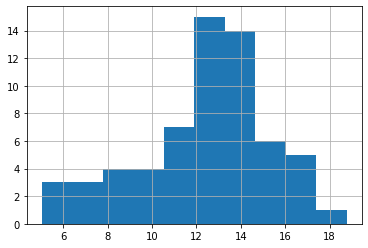

In [22]:
bank_info_df.avg_loan_rate.hist()

<AxesSubplot:>

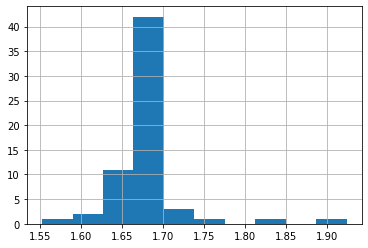

In [23]:
bank_info_df.avg_cofix_rate.hist()

<AxesSubplot:>

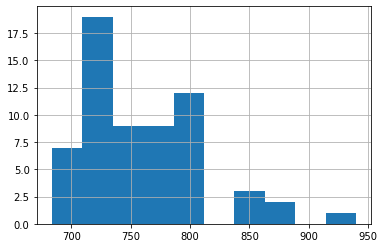

In [24]:
bank_info_df.avg_credit_score.hist()

<AxesSubplot:>

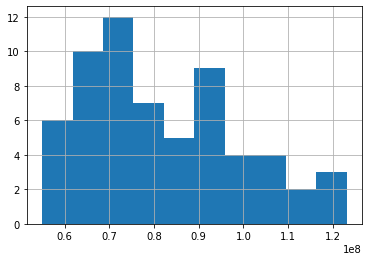

In [25]:
bank_info_df.avg_existing_loan_amt.hist()

<AxesSubplot:>

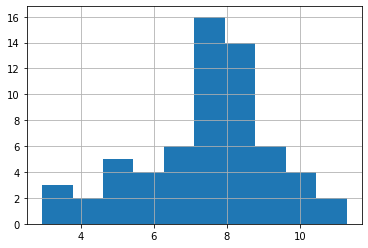

In [26]:
bank_info_df.avg_loan_rate_per_cofix_rate.hist()

In [144]:
from sklearn.preprocessing import MinMaxScaler
scaled_features = MinMaxScaler().fit_transform(bank_info_df.values) # 이상치를 죽이기 위해서 MinMaxScaler 사용
scaled_bank_info_df = pd.DataFrame(scaled_features, index=bank_info_df.index, columns=bank_info_df.columns)
scaled_bank_info_df['bank_id'] = scaled_bank_info_df.index # bank_id 까지 스케일되어서 다시 인덱스화

In [149]:
from sklearn.cluster import KMeans
clusterer_input_df = scaled_bank_info_df.iloc[:,1:-1] # bank_id 제외하고 fit 하기 위함
kmeans_clusterer = KMeans(n_clusters=3) # 제 1, 2, 3, 금융권으로 구분하는게 목표이기 때문
kmeans_clusterer.fit(clusterer_input_df) 
cluster_labels = kmeans_clusterer.predict(clusterer_input_df)
scaled_bank_info_df['label'] = cluster_labels

In [150]:
scaled_bank_info_df

,bank_id,avg_loan_rate,avg_cofix_rate,avg_credit_score,avg_existing_loan_amt,avg_loan_rate_per_cofix_rate,label
0,0,0.521620,0.301841,0.235682,0.467967,0.532297,1
1,1,0.639117,0.757678,0.122888,0.238229,0.551584,1
2,2,0.863880,0.317386,0.420466,0.519525,0.866389,0
3,3,0.263595,0.491514,0.321873,0.285743,0.248851,2
4,4,0.541751,0.271942,0.208975,0.551433,0.557536,0
...,...,...,...,...,...,...,...
57,57,0.034020,0.292597,0.710389,0.368755,0.048380,2
58,58,0.577566,0.319442,0.649425,0.605826,0.585990,0
59,59,0.347581,0.313793,0.164120,0.506939,0.356863,1
60,60,0.590980,0.319339,0.183726,0.284205,0.596169,1


In [151]:
from sklearn.decomposition import PCA
pca_input_df = scaled_bank_info_df.iloc[:,1:-1] # bank_id와 label을 제외하고 pca 하기 위함
# pca_input_df = bank_info_df.iloc[:,1:] # bank_id와 label을 제외하고 pca 하기 위함
pca = PCA(n_components=2)
printcipal_components = pca.fit_transform(pca_input_df)
principal_df = pd.DataFrame(
    data=printcipal_components,
    columns = ['principal_component_1', 'principal_component_2']
    )
principal_df['label'] = cluster_labels

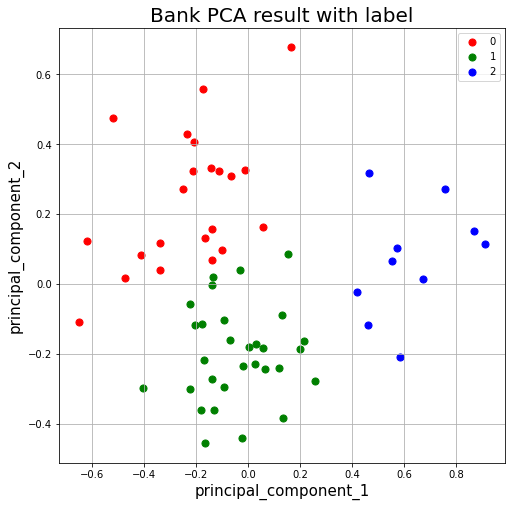

In [152]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(1, 1, 1)
ax.set_xlabel('principal_component_1', fontsize = 15)
ax.set_ylabel('principal_component_2', fontsize = 15)
ax.set_title('Bank PCA result with label', fontsize=20)

labels = [0, 1, 2]
colors = ['r', 'g', 'b']
for label, color in zip(labels, colors):
    label_idx = scaled_bank_info_df['label'] == label
    ax.scatter(
        principal_df.loc[label_idx, 'p_component_1'],
        principal_df.loc[label_idx, 'p_component_2'],
        c = color,
        s = 50
        )
ax.legend(labels)
ax.grid()

In [153]:
import plotly.express as px
from sklearn.decomposition import PCA

X = pca_input_df

pca = PCA(n_components=3)
components = pca.fit_transform(X)

total_var = pca.explained_variance_ratio_.sum() * 100

fig = px.scatter_3d(
    components, x=0, y=1, z=2, color=scaled_bank_info_df['label'],
    title=f'Total Explained Variance: {total_var:.2f}%',
    labels={'0': 'p_component_1', '1': 'p_component_2', '2': 'p_component_3'}
)

fig.update_layout(
    autosize=False,
    width=1600,
    height=800
)

fig.show()

In [155]:
eigen_value = pca.explained_variance_
explained_variance_ratio = pca.explained_variance_ratio_

In [156]:
eigen_value

array([0.11475347, 0.06710088, 0.02315142])

In [157]:
explained_variance_ratio

array([0.52557022, 0.30732162, 0.10603337])

## 검증 후 각 군집별 은행의 특징 찾기

In [91]:
bank_info_df['label'] = cluster_labels
bank_info_df

,bank_id,avg_credit_score,avg_existing_loan_amt,avg_loan_rate_per_cofix_rate,label
0,1.0,743.933257,8.683993e+07,7.380155,1
1,2.0,714.998620,7.118824e+07,7.541129,0
2,3.0,791.334890,9.035253e+07,10.168660,1
3,4.0,766.043331,7.442532e+07,5.014361,2
4,5.0,737.082047,9.252637e+07,7.590807,1
...,...,...,...,...,...
57,60.0,865.707609,8.008077e+07,3.341117,2
58,61.0,850.068579,9.623212e+07,7.828299,1
59,62.0,725.575838,8.949509e+07,5.915886,1
60,63.0,730.605173,7.432051e+07,7.913262,0


In [95]:
for label, label_df in bank_info_df.groupby('label'):
    print(f'✅ Bank {label} mean info')
    #print(f'\t ◽ num_applied_loan : {label_df.num_applied_loan.mean():.2f}')
    #print(f'\t ◽ num_product : {label_df.num_product.mean():.2f}')
    #print(f'\t ◽ avg_loan_rate : {label_df.avg_loan_rate.mean():.2f}')
    #print(f'\t ◽ avg_cofix_rate : {label_df.avg_cofix_rate.mean():.2f}')
    print(f'\t ◽ avg_credit_score : {label_df.avg_credit_score.mean():.2f}')
    print(f'\t ◽ avg_existing_loan_amt : {label_df.avg_existing_loan_amt.mean():.2f}')
    print(f'\t ◽ avg_loan_rate_per_cofix_rate : {label_df.avg_loan_rate_per_cofix_rate.mean():.2f}')

✅ Bank 0 mean info
	 ◽ avg_credit_score : 726.47
	 ◽ avg_existing_loan_amt : 69037068.50
	 ◽ avg_loan_rate_per_cofix_rate : 7.85
✅ Bank 1 mean info
	 ◽ avg_credit_score : 765.38
	 ◽ avg_existing_loan_amt : 99183183.64
	 ◽ avg_loan_rate_per_cofix_rate : 8.30
✅ Bank 2 mean info
	 ◽ avg_credit_score : 831.65
	 ◽ avg_existing_loan_amt : 71206672.68
	 ◽ avg_loan_rate_per_cofix_rate : 4.26


array([[<AxesSubplot:title={'center':'0'}>,
        <AxesSubplot:title={'center':'1'}>],
       [<AxesSubplot:title={'center':'2'}>, <AxesSubplot:>]], dtype=object)

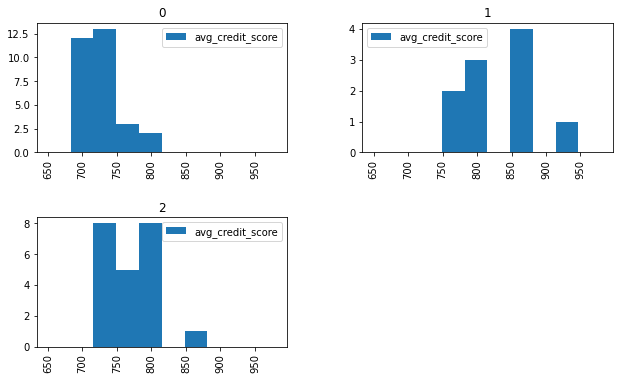

In [128]:
bank_info_df.hist(
    figsize=(10, 6),
    column='avg_credit_score',
    by='label',
    legend=True,
    range=(650,980)
    )